In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

In [2]:
# parameters
zeta = 0.05    # damping ratio
omega_0 = 1.0  # natural frequency
epsilon = 0.1  # amplitude of frequency modulation
omega_d = 2.0  # driving frequency
g = 0.1        # coupling strength

# initial conditions
y0 = [0.0, 1.0, 0.0, 0.0]

# time domain
t_span = [0, 100]
t = np.linspace(t_span[0], t_span[1], 2000)

In [3]:
# the differential equation system
def oscillator(t, y):
    omega = omega_0 * (1 + epsilon * np.cos(omega_d * t))
    dydt = [y[1], -2 * zeta * omega * y[1] - omega**2 * y[0] - g * y[2], 
            y[3], -2 * zeta * omega * y[3] - omega**2 * y[2] - g * y[0]]
    return dydt

In [4]:
# solve the differential equation
sol = solve_ivp(oscillator, t_span, y0, t_eval=t)

In [5]:
# compute the spectrogram of the solutions
freqs1, times1, Sx1 = spectrogram(sol.y[0], fs=1/(t[1]-t[0]), nperseg=100, noverlap=50)
freqs2, times2, Sx2 = spectrogram(sol.y[2], fs=1/(t[1]-t[0]), nperseg=100, noverlap=50)

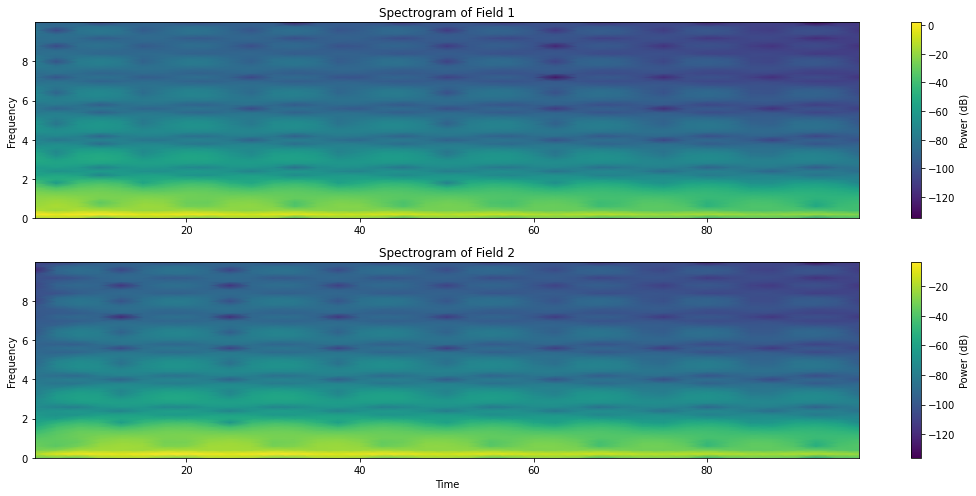

In [6]:
# plot the spectrograms
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.pcolormesh(times1, freqs1, 10 * np.log10(Sx1), shading='gouraud')
plt.title('Spectrogram of Field 1')
plt.ylabel('Frequency')
plt.colorbar(label='Power (dB)')

plt.subplot(2, 1, 2)
plt.pcolormesh(times2, freqs2, 10 * np.log10(Sx2), shading='gouraud')
plt.title('Spectrogram of Field 2')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Power (dB)')

plt.tight_layout()
plt.show()